In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from hexagon_utilities import *
from colors import *
import plot_functions as pf
from hex_trees import *
from matplotlib.patches import Ellipse


In [5]:
#https://stackoverflow.com/questions/27161533/find-the-shortest-distance-between-a-point-and-line-segments-not-line
def point_to_line_dist(pt, line_seg_endpoint1, line_seg_endpoint2 ):
    """Calculate the distance between a point and a line segment.

    To calculate the closest distance to a line segment, we first need to check
    if the point projects onto the line segment.  If it does, then we calculate
    the orthogonal distance from the point to the line.
    If the point does not project to the line segment, we calculate the 
    distance to both endpoints and take the shortest distance.

    :param point: Numpy array of form [x,y], describing the point.
    :type point: numpy.core.multiarray.ndarray
    :param line: list of endpoint arrays of form [P1, P2]
    :type line: list of numpy.core.multiarray.ndarray
    :return: The minimum distance to a point.
    :rtype: float
    """
    
    point = np.array(pt)
    line = np.array([[line_seg_endpoint1[0], line_seg_endpoint1[1]] ,
                     [line_seg_endpoint2[0], line_seg_endpoint2[1]]])
                     
    
    # unit vector
    unit_line = line[1] - line[0]
    norm_unit_line = unit_line / np.linalg.norm(unit_line)

    # compute the perpendicular distance to the theoretical infinite line
    segment_dist = (
        np.linalg.norm(np.cross(line[1] - line[0], line[0] - point)) /
        np.linalg.norm(unit_line)
    )

    diff = (
        (norm_unit_line[0] * (point[0] - line[0][0])) + 
        (norm_unit_line[1] * (point[1] - line[0][1]))
    )

    x_seg = (norm_unit_line[0] * diff) + line[0][0]
    y_seg = (norm_unit_line[1] * diff) + line[0][1]

    endpoint_dist = min(
        np.linalg.norm(line[0] - point),
        np.linalg.norm(line[1] - point)
    )

    # decide if the intersection point falls on the line segment
    lp1_x = line[0][0]  # line point 1 x
    lp1_y = line[0][1]  # line point 1 y
    lp2_x = line[1][0]  # line point 2 x
    lp2_y = line[1][1]  # line point 2 y
    is_betw_x = lp1_x <= x_seg <= lp2_x or lp2_x <= x_seg <= lp1_x
    is_betw_y = lp1_y <= y_seg <= lp2_y or lp2_y <= y_seg <= lp1_y
    if is_betw_x and is_betw_y:
        return segment_dist
    else:
        # if not, then return the minimum distance to the segment endpoints
        return endpoint_dist

In [6]:
point_to_line_dist((1,5), (2,2), line_seg_endpoint2=(2,7))

1.0

## Try it with a Hexagon's Vertices

[5.663651785364931, 2.6602540378443864, 5.663651785364928, 11.661903789690601, 14.660254037844386, 11.661903789690601]


(-11.0, 11.0, -9.526279441628828, 9.526279441628828)

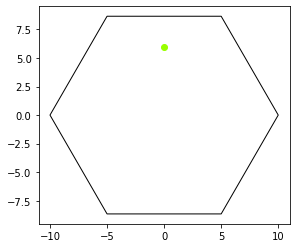

In [20]:
fig, ax = plt.subplots()
h = Hex(0,0,10)
vs = h.get_verts()
pt = (0,6)

dists = []
for v in range(6):
    dists.append(point_to_line_dist(pt, vs[v], vs[(v+1)%6]))
    
print(dists)
plt.scatter(*pt, color='#99ff00')

    
h.render(fill=None)
plt.axis('scaled')

In [13]:
h.point_distance((0,8.6))


0.060254037844386765

(-2.0029936796191525,
 42.00347543054903,
 -1.0048847169503543,
 21.00585249593327)

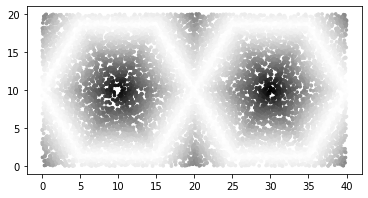

In [84]:
fig, ax = plt.subplots()
h = Hex(10,10,10)
h2 = Hex(30,10,10)

def calculate_min_dist(pts, hlist):
    
    min_dist = [100] * len(pts)
    for h in hlist:
        dists = np.asarray([h.point_distance(p) for p in pts])
        
        
        for pi in range(len(pts)):
            if dists[pi] < min_dist[pi]:
                        min_dist[pi] = dists[pi]
                        
    return min_dist
                        
x = np.random.random(10000) * 40
y = np.random.random(10000) * 20
pts = list(zip(x,y))
dists = calculate_min_dist(pts, [h,h2])
                        

plt.scatter(x,y, c=dists, s=7, cmap='Greys')


#h.render(fill=None)
plt.axis('scaled')

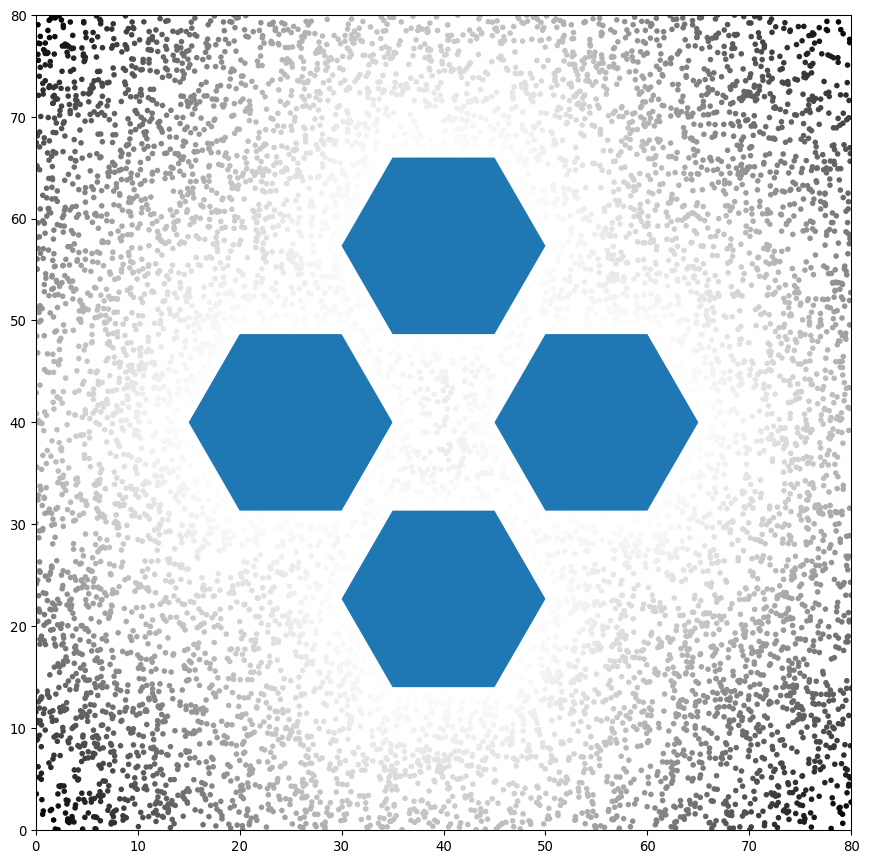

In [103]:
fig, ax = plt.subplots(figsize=(1080/96, 1080/96), dpi=96)
size = 10
cx, cy = 40,40
h0 = Hex(cx - 1.5*size,cy, size)
h1 = Hex(cx + 1.5*size, cy, size)
h2 = Hex(cx,cy-1.732*size,size)
h3 = Hex(cx,cy+1.732*size,size)


def calculate_min_dist(pts, hlist):
    
    min_dist = [100] * len(pts)
    for h in hlist:
        #calculate distance of each point to this hex
        dists = np.asarray([h.point_distance(p) for p in pts])        
        #update if the minimum distance is smaller than for other hexagons so far
        min_dist = np.minimum(dists, min_dist)
                        
    return min_dist

scale = 80
x = np.random.random(10000) * 80
y = np.random.random(10000) * 80
pts = list(zip(x,y))
dists = calculate_min_dist(pts, [h0,h1,h2,h3])
                        

plt.scatter(x,y, c=dists, s=10, cmap='Greys')

#just to show what is going on
for h in [h1,h0,h2,h3]:
    h.render()

#h.render(fill=None)
plt.axis('scaled')

xclip, yclip = 0.8, 0.7
y_range = scale
x_range = scale
ax.set_ybound(lower=0, upper=y_range)
ax.set_xbound(lower=0, upper=x_range)
#plt.axis('off')

In [106]:
def calculate_min_dist(pts, hlist):
    
    min_dist = [100] * len(pts)
    for h in hlist:
        #calculate distance of each point to this hex
        dists = np.asarray([h.point_distance(p) for p in pts])        
        #update if the minimum distance is smaller than for other hexagons so far
        min_dist = np.minimum(dists, min_dist)
                        
    return min_dist

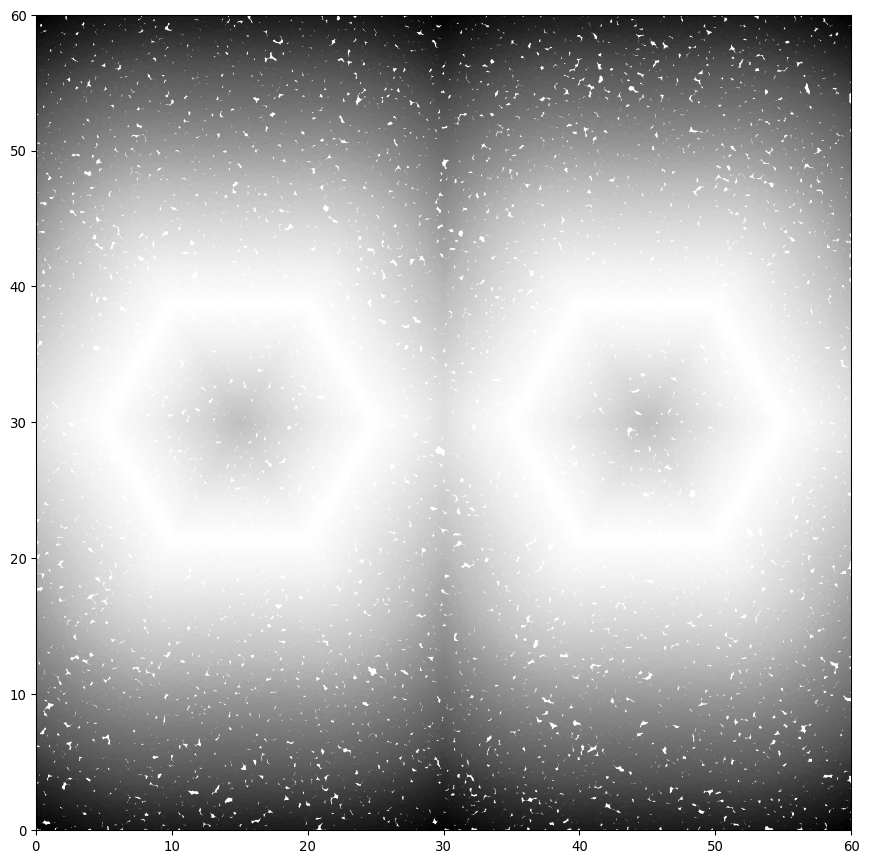

In [108]:
fig, ax = plt.subplots(figsize=(1080/96, 1080/96), dpi=96)
size = 10
scale = 60
cx, cy = scale/2, scale/2
h0 = Hex(cx - 1.5*size,cy, size)
h1 = Hex(cx + 1.5*size, cy, size)
h2 = Hex(cx,cy-1.732*size,size)
h3 = Hex(cx,cy+1.732*size,size)

x = np.random.random(100_000) * scale
y = np.random.random(100_000) * scale
pts = list(zip(x,y))
dists = calculate_min_dist(pts, [h0,h1])
                        

plt.scatter(x,y, c=dists, s=10, cmap='Greys')
plt.axis('scaled')

y_range = scale
x_range = scale
ax.set_ybound(lower=0, upper=y_range)
ax.set_xbound(lower=0, upper=x_range)


plt.savefig('images/gradient_2.png')



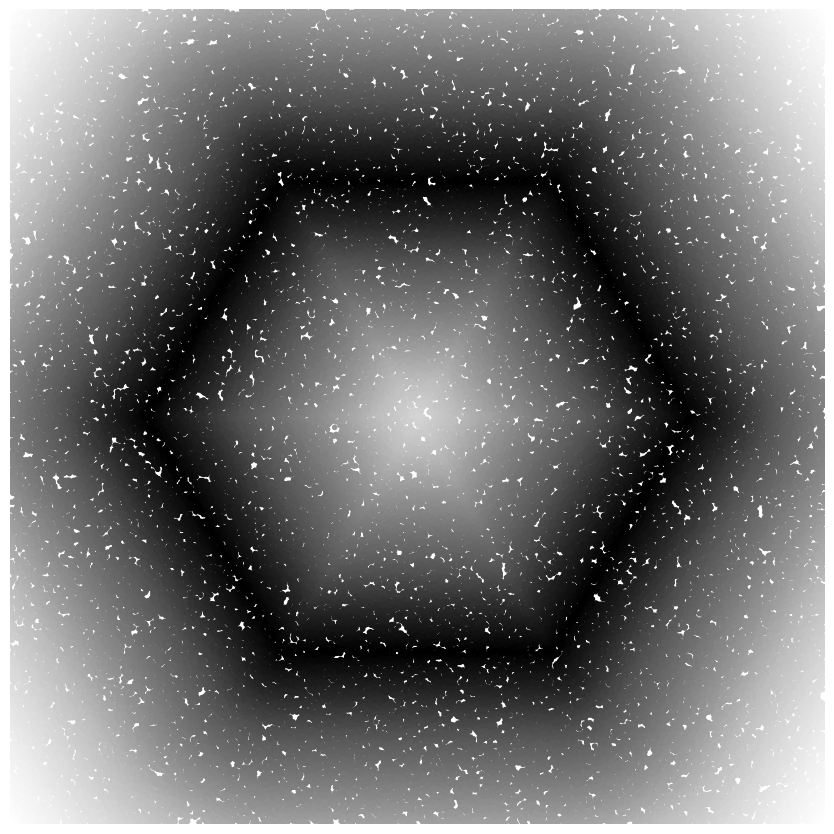

In [115]:
fig, ax = plt.subplots(figsize=(1080/96, 1080/96), dpi=96)
size = 10
scale = 30
cx, cy = scale/2, scale/2
h0 = Hex(15, 15, size)

x = np.random.random(100_000) * scale
y = np.random.random(100_000) * scale
pts = list(zip(x,y))
dists = calculate_min_dist(pts, [h0])
                        

plt.scatter(x,y, c=dists, s=10, cmap='Greys_r')
plt.axis('scaled')

y_range = scale
x_range = scale
ax.set_ybound(lower=0, upper=y_range)
ax.set_xbound(lower=0, upper=x_range)

plt.axis('off')

plt.savefig('images/center_1515_30rev.png')


Make getting the minimum distance into its own function, so that it can be abstracted away.

In [10]:
def get_distance_pt_to_hexagon(pt, h):
    
    vs = h.get_verts()
    dists = []
    for v in range(6):
        dists.append(point_to_line_dist(pt, vs[v], vs[(v+1)%6]))
    return min(dists)